In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293378 sha256=76f8fd02afe1a47fc8659cac3ef5241b74c3753b868fa9408c609c0e7d2764b9
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from datetime import datetime 

2024-05-24 14:04:28.713639: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 14:04:28.713774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 14:04:28.883749: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [4]:
# Companys 
tech_list = ['AMZN', 'AAPL', 'APA', 'MS']

# time stamps
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AMZN, AAPL, APA, MS]
company_name = ["AMAZON", "APPLE", "APA", "Morgan Stanley"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
(df.tail(10))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-13,98.750000,98.970001,98.419998,98.559998,98.559998,5379000,Morgan Stanley
2024-05-14,99.000000,100.180000,98.769997,99.379997,99.379997,6216600,Morgan Stanley
2024-05-15,100.040001,100.980003,99.989998,100.519997,100.519997,6938500,Morgan Stanley
2024-05-16,100.150002,100.410004,99.449997,99.580002,99.580002,4339300,Morgan Stanley
2024-05-17,99.900002,100.300003,99.300003,100.220001,100.220001,4690800,Morgan Stanley
2024-05-20,100.050003,100.889999,99.379997,100.330002,100.330002,5690200,Morgan Stanley
2024-05-21,100.309998,103.250000,100.150002,101.529999,101.529999,8337100,Morgan Stanley
2024-05-22,101.279999,102.519997,100.169998,100.739998,100.739998,5194300,Morgan Stanley
2024-05-23,100.379997,100.559998,98.480003,98.919998,98.919998,5594100,Morgan Stanley


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-05-24 to 2024-05-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


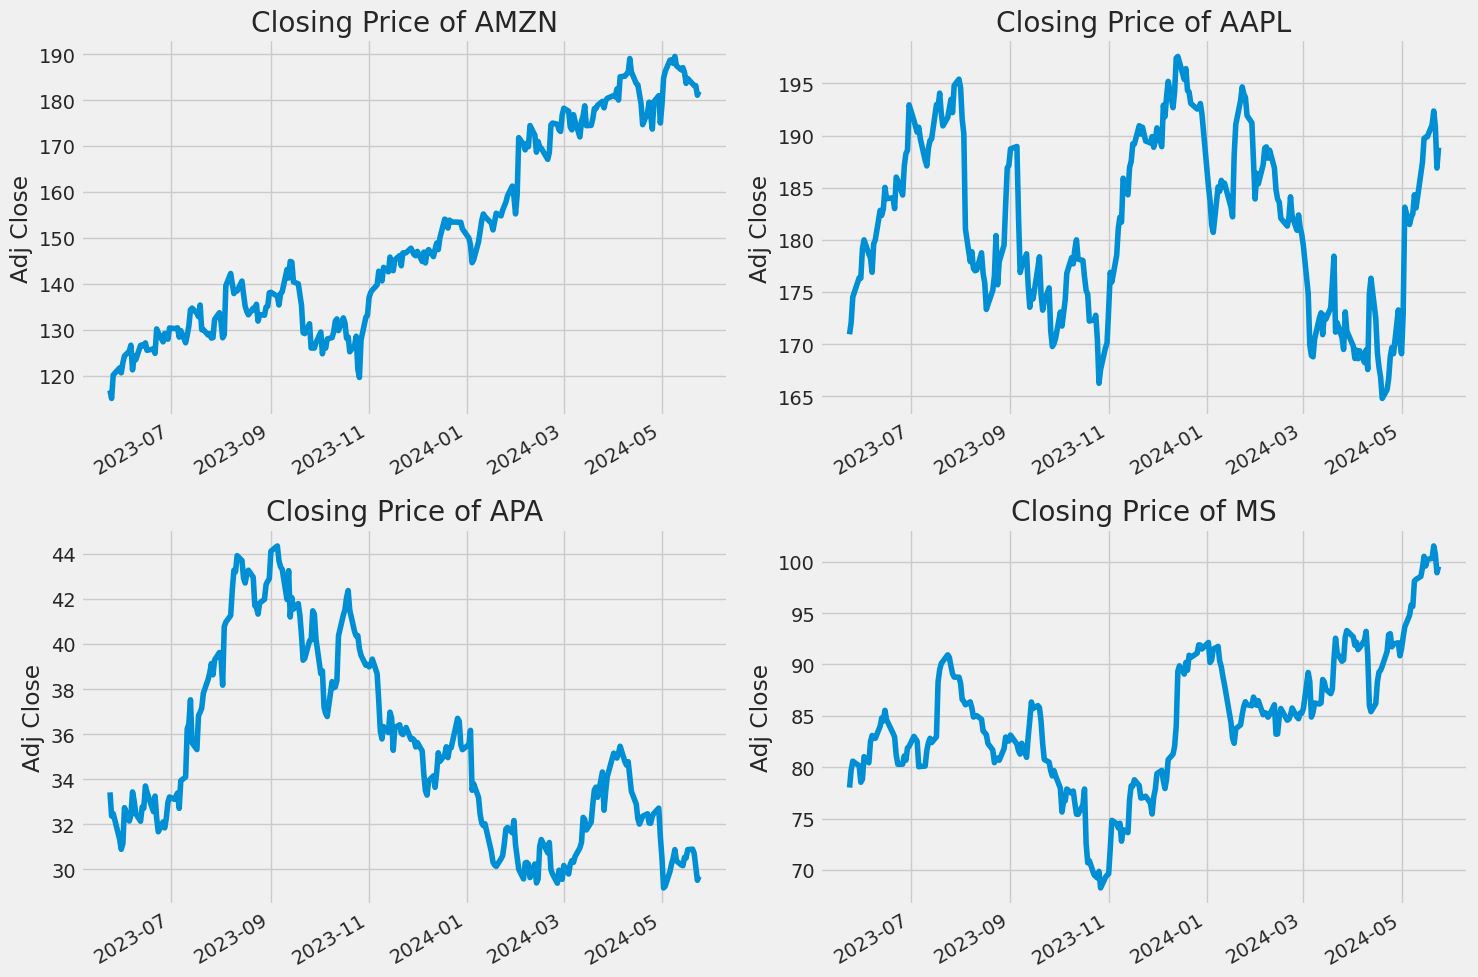

In [5]:
# Summarising the data

AAPL.describe()

# General info

AAPL.info()

# historical closing price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()


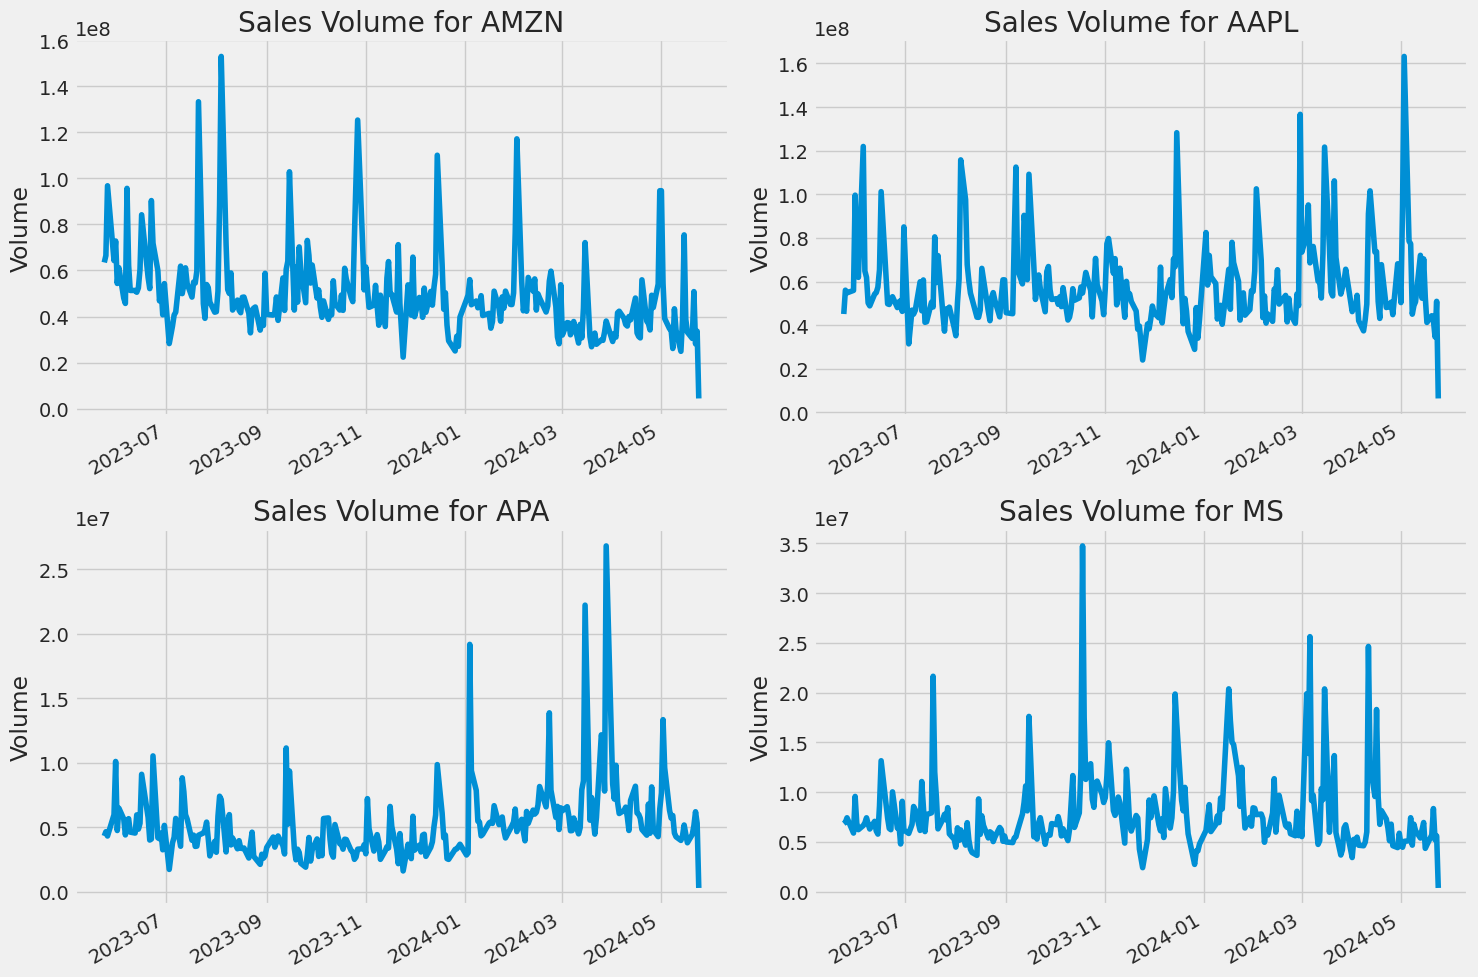

In [6]:
# Volume of sales

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()


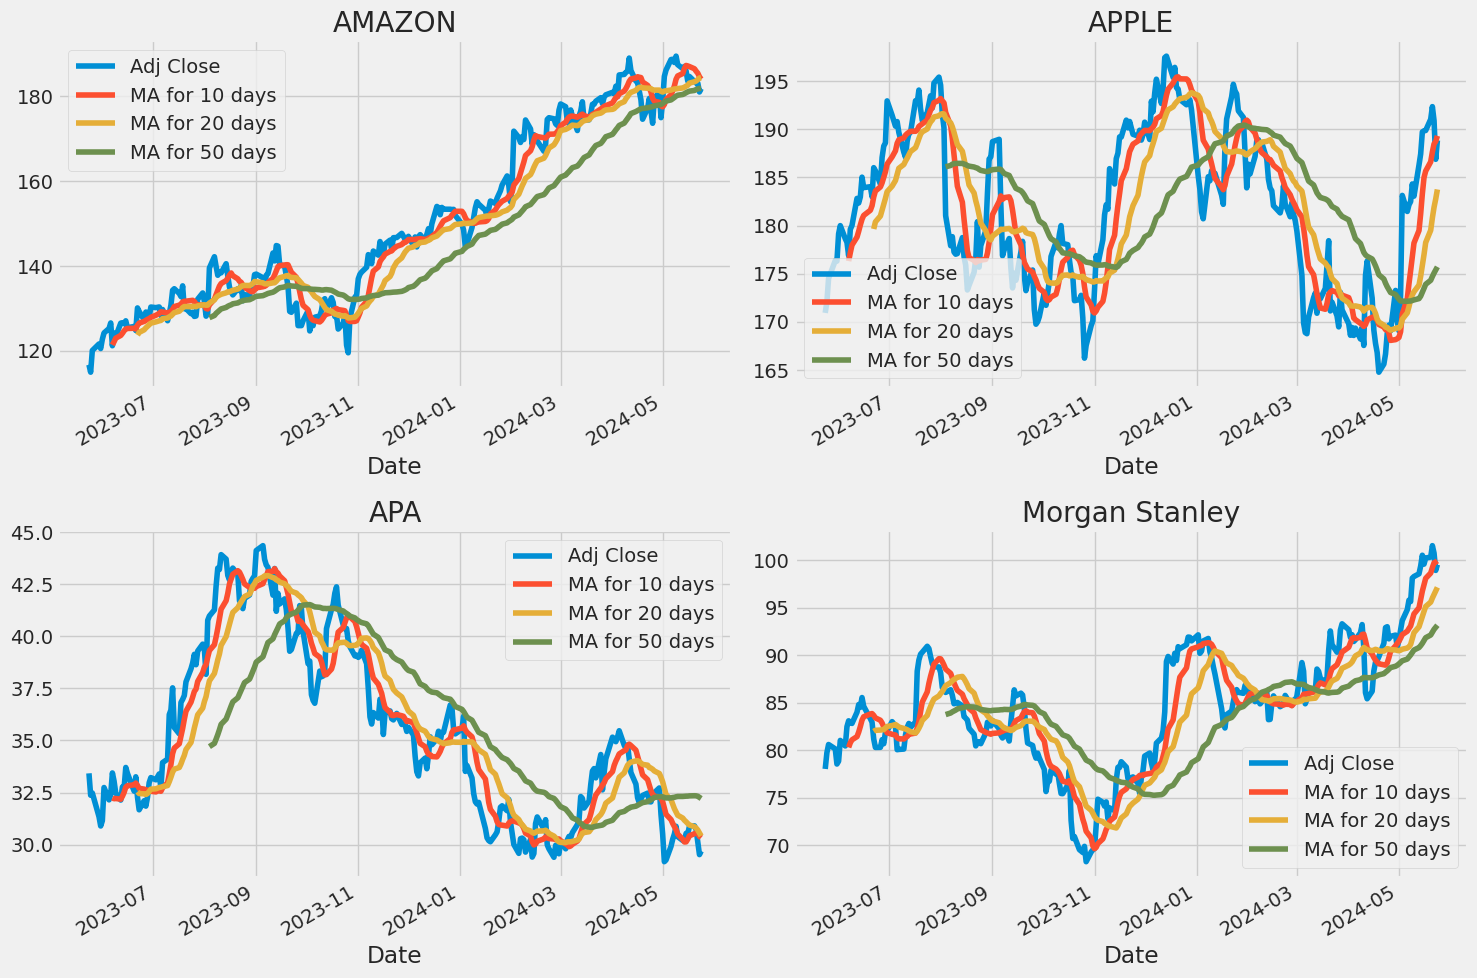

In [7]:
# Moving average

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('AMAZON')
fig.tight_layout()

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('APPLE')
fig.tight_layout()

APA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('APA')
fig.tight_layout()

MS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('Morgan Stanley')
fig.tight_layout()

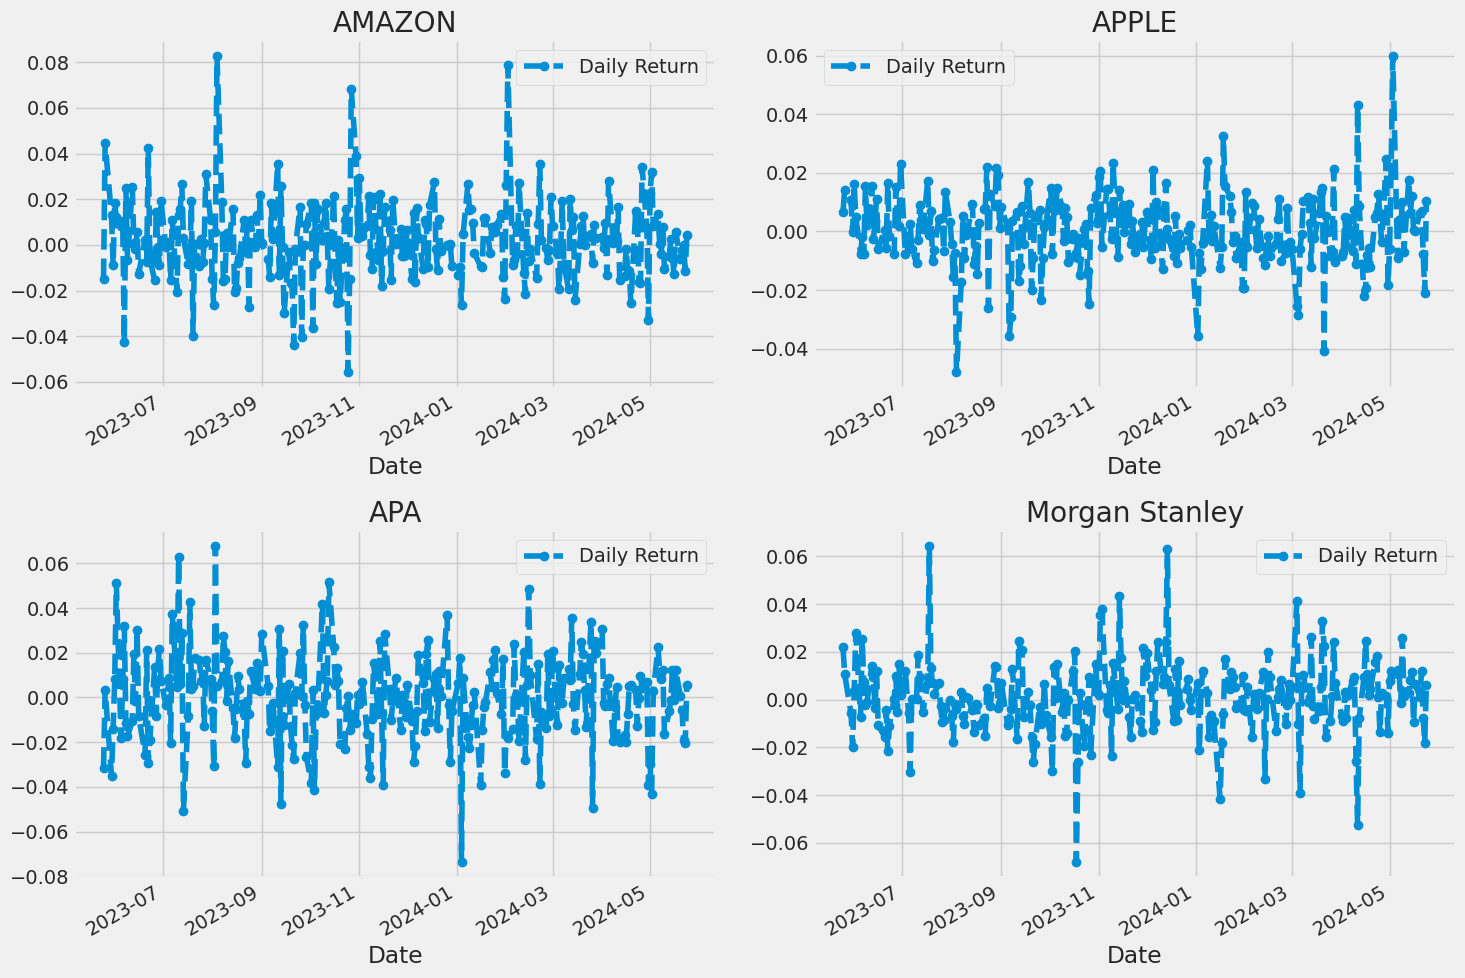

In [8]:
# Average daily stock return

# pct_change to find percentage change for each day

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Daily return percentage

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AMZN['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('AMAZON')
fig.tight_layout()


AAPL['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('APPLE')
fig.tight_layout()


APA['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('APA')
fig.tight_layout()


MS['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('Morgan Stanley')
fig.tight_layout()


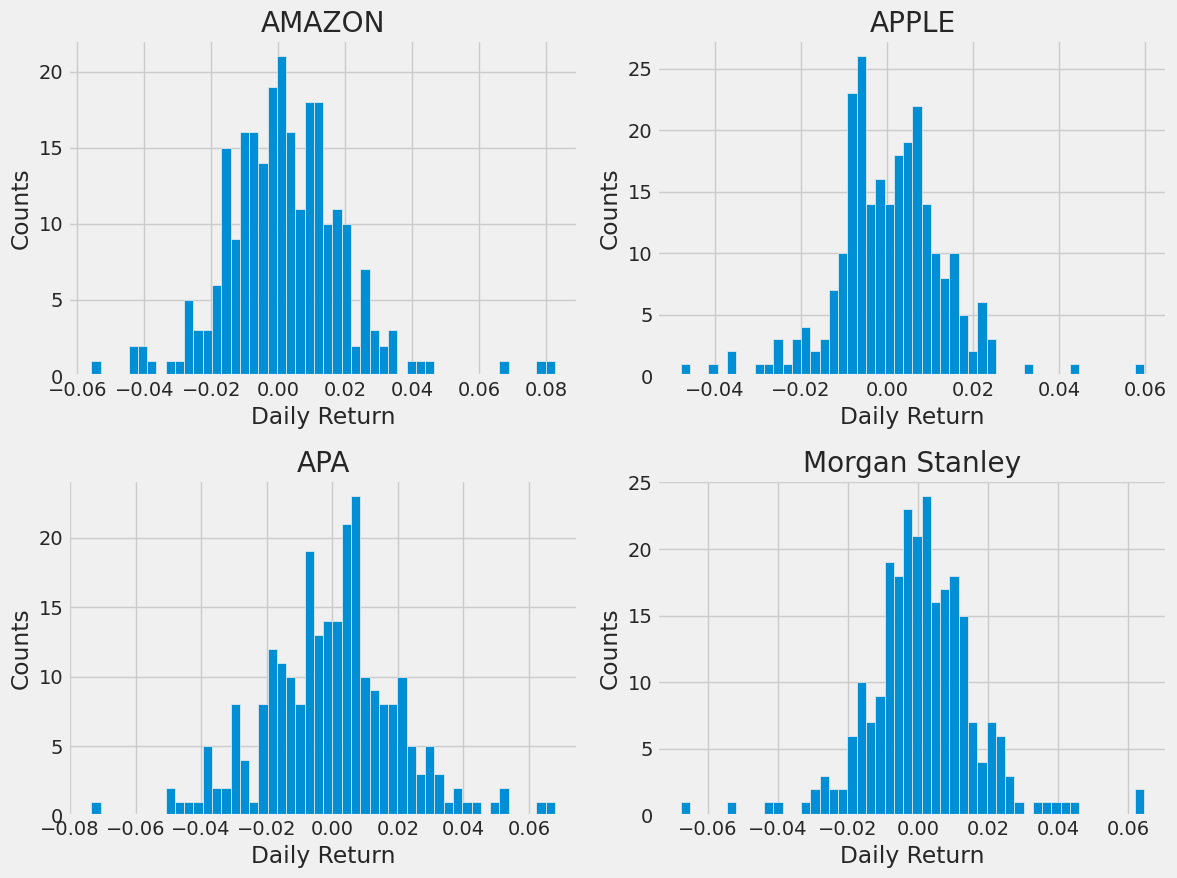

In [9]:
# using a histogram to get an overall look at the average daily returns.

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

[*********************100%%**********************]  4 of 4 completed
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a f

Text(0.5, 1.0, 'Correlation of stock closing price')

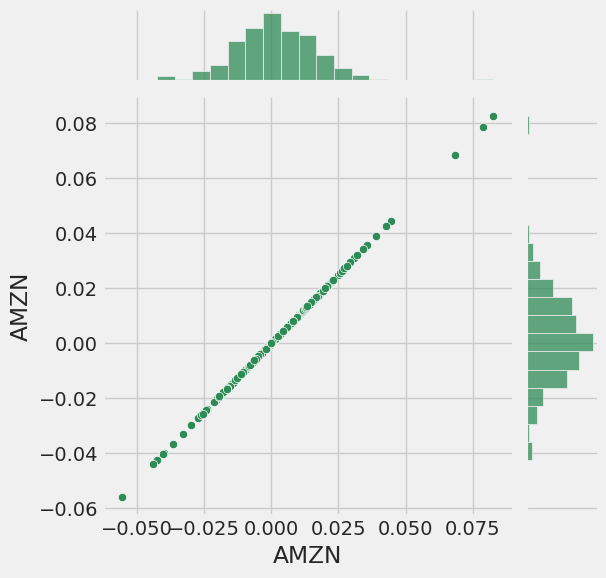

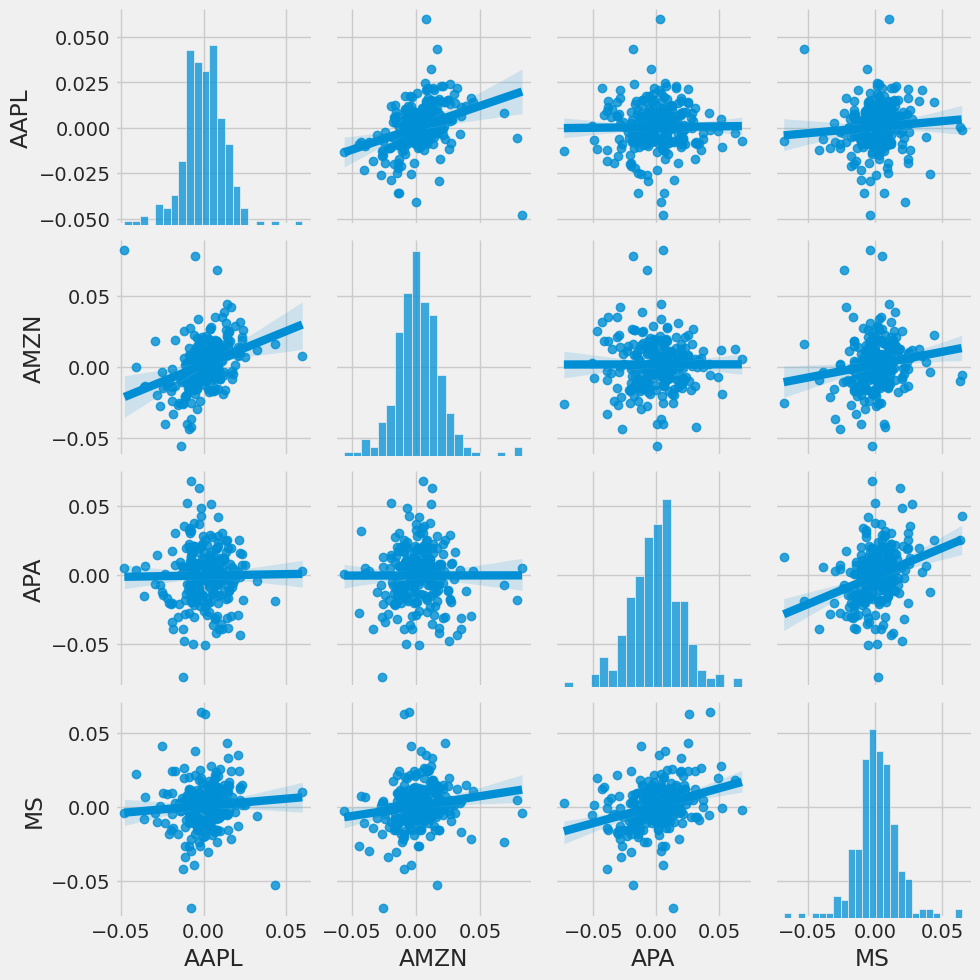

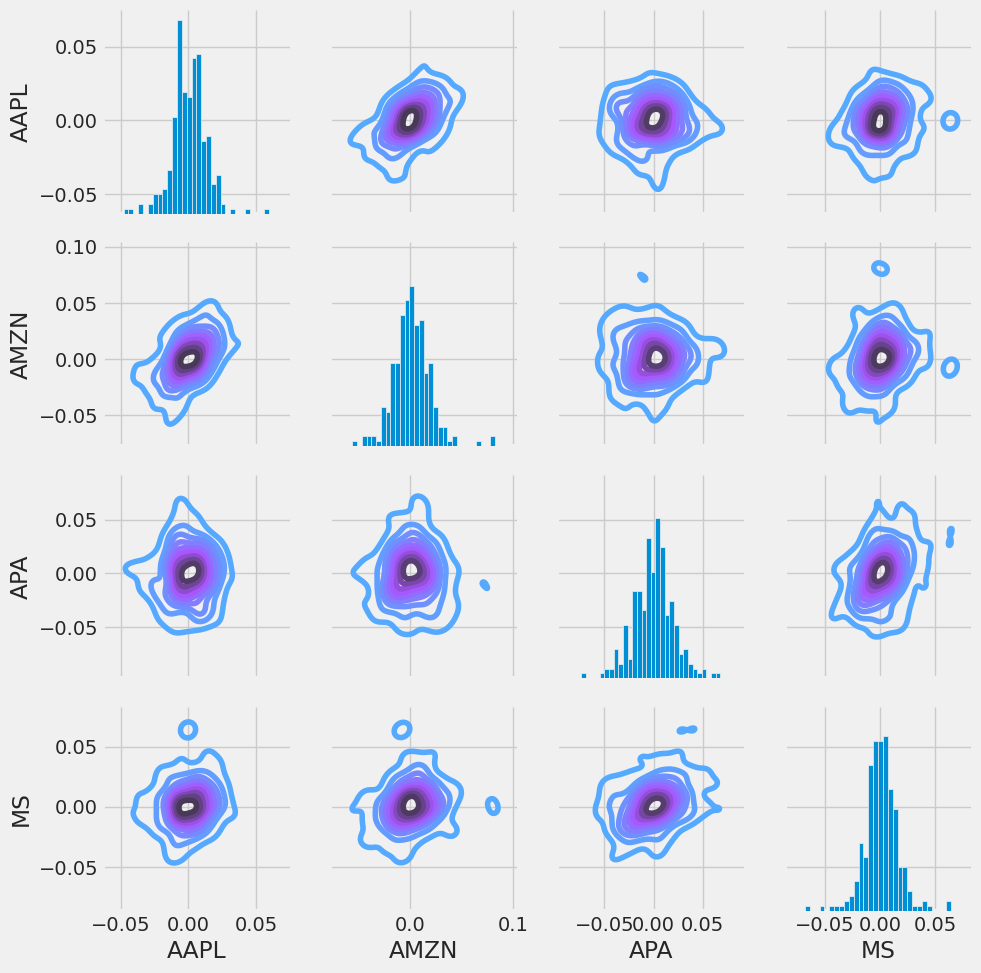

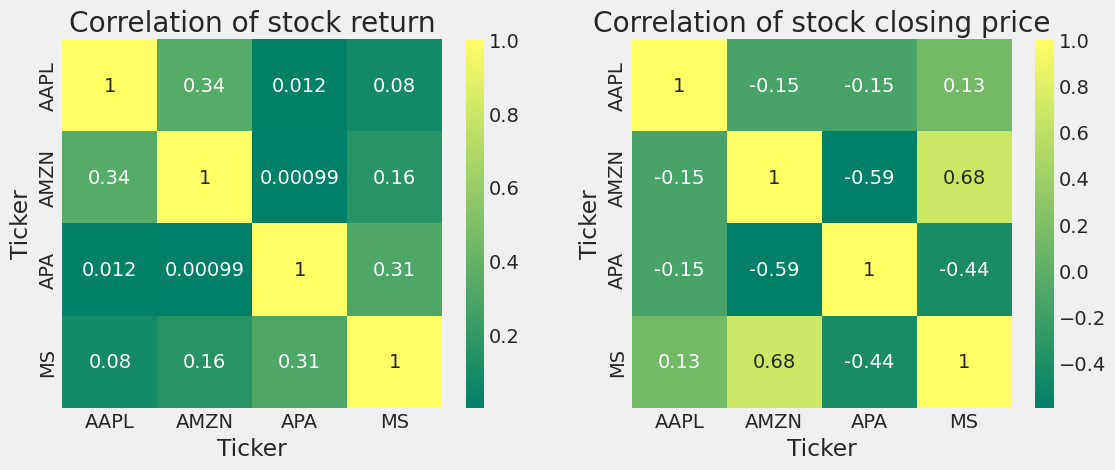

In [10]:

# Correlation between different stocks closing prices

# Grab all tghe closing prices for the tech stock list into one Dataframe

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# New tech returns Dataframe

tech_rets = closing_df.pct_change()
tech_rets.head()

# Compare daily percentage return of two stock stop check how correlated

(sns.jointplot(x='AMZN', y='AMZN', data=tech_rets, kind='scatter', color='seagreen'))

# If two stocks are perfectly correlated with eachother we get a linear relationship
# Now going to plot all the stocks against eachother

sns.pairplot(tech_rets, kind='reg')

# Not many interesting correlations
# Going to use different visualisations

return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(sns.kdeplot, cmap='cool_d')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

# Can also do a correlation plot to get numerical values for the correlation between daily return values
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

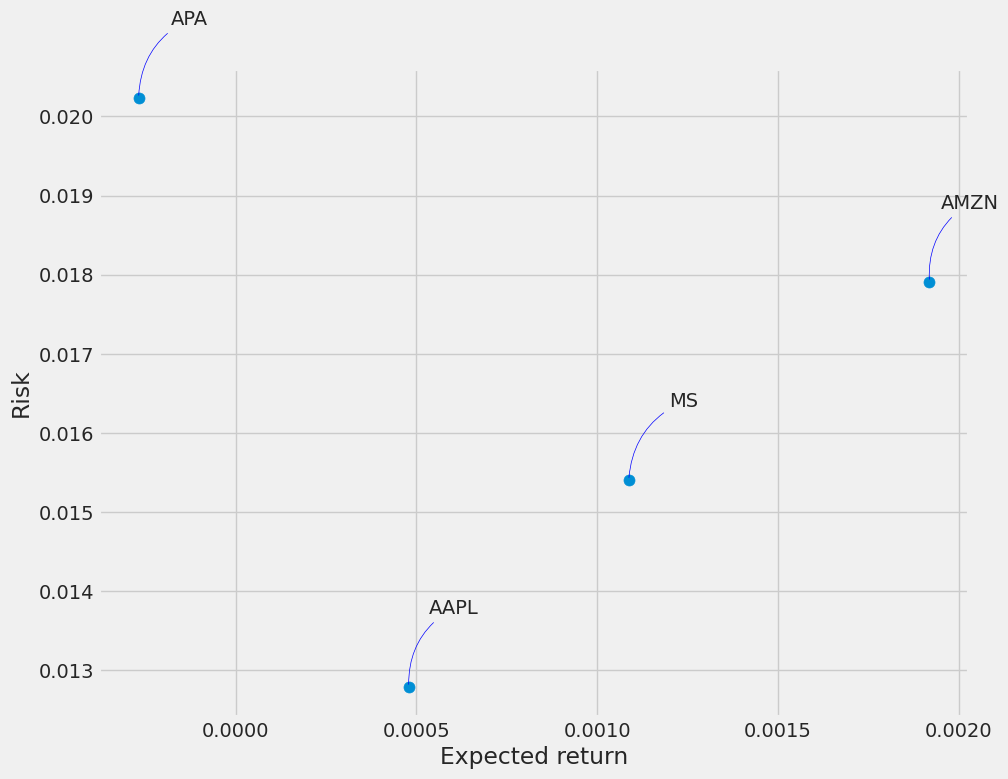

In [11]:
# Quantifying risk
# Basic method: Compare the expected return with the standard deviation of the daily returns
rets = tech_rets.dropna()
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=0.3'))

[*********************100%%**********************]  1 of 1 completed


2487

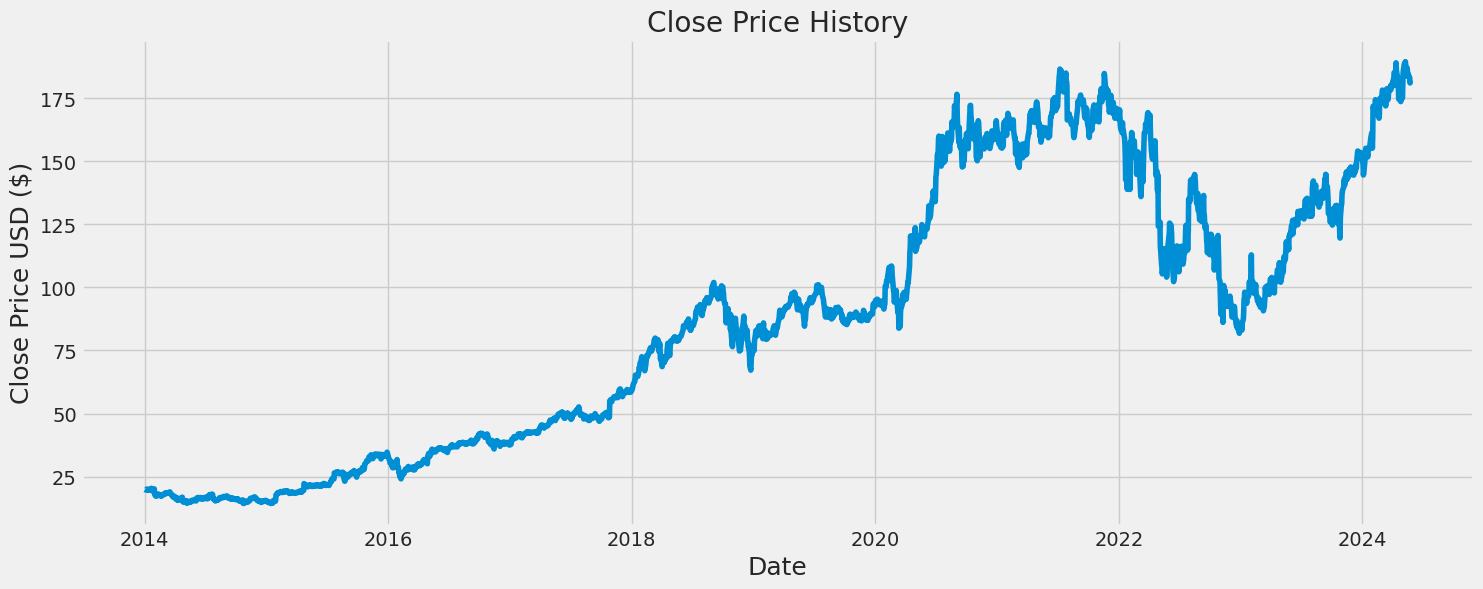

In [12]:
# Predicting the closing price of AMAZON

df = pdr.get_data_yahoo('AMZN', start='2014-01-01', end=datetime.now())

plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Create a new dataframe with only the close column
data = df.filter(['Close'])
# Converting the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

(training_data_len)

In [13]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

(scaled_data)

# Create the scaled training dataset
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.03169239, 0.03125562, 0.03045346, 0.03170952, 0.03281998,
       0.0325602 , 0.03160389, 0.02969698, 0.03156964, 0.03109291,
       0.03107293, 0.03216054, 0.03428442, 0.03356789, 0.03223477,
       0.0287321 , 0.02835529, 0.03068184, 0.02776152, 0.03313113,
       0.0204793 , 0.01689956, 0.01741339, 0.0169852 , 0.01930889,
       0.02116156, 0.02110162, 0.02136424, 0.0177845 , 0.02005396,
       0.02009678, 0.01904056, 0.01725068, 0.01794151, 0.01707369,
       0.01850673, 0.02037368, 0.02079616, 0.02089037, 0.02145273,
       0.02079046, 0.02196657, 0.02438446, 0.02432452, 0.02429598,
       0.02385921, 0.02337106, 0.02389061, 0.02413897, 0.02477556,
       0.02514666, 0.02621144, 0.02462997, 0.02341388, 0.02103025,
       0.01852672, 0.01934315, 0.01611738, 0.01470718, 0.0146558 ])]
[0.014107709962655701]

[array([0.03169239, 0.03125562, 0.03045346, 0.03170952, 0.03281998,
       0.0325602 , 0.03160389, 0.02969698, 0.03156964, 0.03109291,
       0.03107293, 0.03216054, 0.0

In [14]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2427/2427 ━━━━━━━━━━━━━━━━━━━━ 101s 40ms/step - loss: 0.0030


In [15]:
# create the testing data
# Create a new array containing scaled values from index 1543 to 2002

test_data = scaled_data[training_data_len - 60:, :]
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

# Convert the ata to a numpy array
x_test = np.array(x_test)

# reshappe the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


2.8885732300903393


/tmp/ipykernel_18/3165133046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


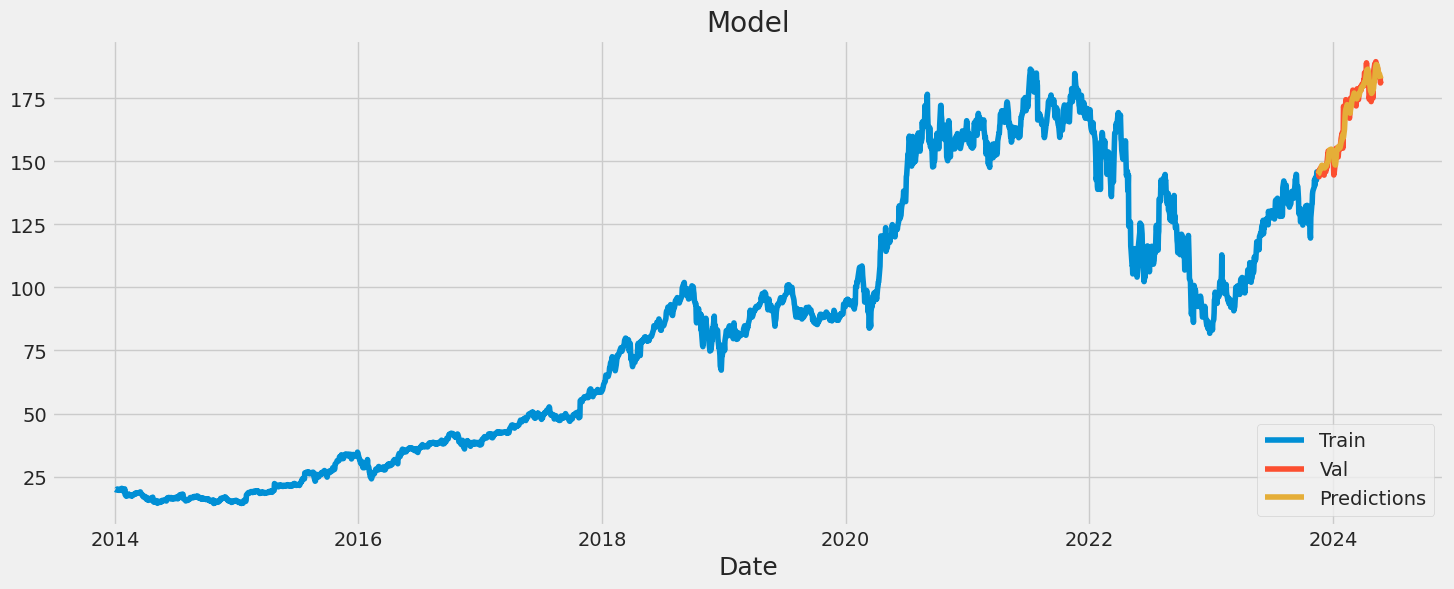

,Close,Predictions
Date,,
2023-11-17,145.179993,144.798615
2023-11-20,146.130005,145.189743
2023-11-21,143.899994,145.900345
2023-11-22,146.710007,146.045868
2023-11-24,146.740005,146.626007
...,...,...
2024-05-20,183.539993,184.600464
2024-05-21,183.149994,184.040192
2024-05-22,183.130005,183.594391


In [16]:
# Get the root mean squared errp
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


valid